In [3]:
import os

import pandas as pd

### Load Data

In [10]:
# Get the directory of the current notebook file
notebook_directory = os.path.dirname(os.path.abspath("__file__"))
print(notebook_directory)

/Users/florianewald/Documents/CodingProjects/LabelVolas


In [11]:
data_dir = os.path.join(notebook_directory, "vola_data_midpoints")
target_dir = os.path.join(notebook_directory, "labeled_data")

In [14]:
all_vola_samples = [f for f in os.listdir(data_dir) if f.endswith('.csv.gz')]

In [16]:
labeled_files = [f for f in os.listdir(target_dir) if "label_result_file_batch_" in f]

In [19]:
labeled_files

['label_result_file_batch_2.csv',
 'label_result_file_batch_3.csv',
 'label_result_file_batch_1.csv',
 'label_result_file_batch_4.csv',
 'label_result_file_batch_5.csv',
 'label_result_file_batch_7.csv',
 'label_result_file_batch_6.csv',
 'label_result_file_batch_8.csv',
 'label_result_file_batch_9.csv',
 'label_result_file_batch_10.csv']

In [23]:
# concatenate result files:
concatenated_df = pd.DataFrame()
sample_count = 0
for file_name in labeled_files:
    file_path = os.path.join(target_dir, file_name)
    temp_df = pd.read_csv(file_path)
    sample_count += len(temp_df)
    concatenated_df = pd.concat([concatenated_df, temp_df], ignore_index=True)
print("num samples: ", sample_count)

num samples:  3315


In [24]:
concatenated_df.head()

,Filename,Label,Comment
0,DE0006599905_20211119T092425_20211119T095425.c...,0.0,NaN
1,DE000A0D9PT0_20220913T130016_20220913T133016.c...,0.0,NaN
2,DE000A0D9PT0_20221110T132415_20221110T135415.c...,0.0,NaN
3,DE0008430026_20200325T095853_20200325T102853.c...,0.0,NaN
4,DE0005439004_20200527T090613_20200527T093613.c...,1.0,NaN


In [28]:
missed_samples = concatenated_df[pd.isna(concatenated_df['Label'])]

In [34]:
list(missed_samples["Filename"])

['DE0007030009_20220727T101824_20220727T104824.csv.gz',
 'DE000A0D9PT0_20200330T065200_20200330T072200.csv.gz',
 'DE000PAH0038_20200318T085726_20200318T092726.csv.gz',
 'DE0008430026_20200319T110955_20200319T113955.csv.gz',
 'DE0007664039_20220301T093822_20220301T100822.csv.gz']

### Auto EDA

In [1]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 6.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 649.9/649.9 kB 6.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install autowiz

ERROR: Could not find a version that satisfies the requirement autowiz (from versions: none)
ERROR: No matching distribution found for autowiz


In [2]:
!pip install autowiz


profile = ProfileReport(concatenated_df, title="Auto EDA Report", explorative=True)

profile.to_file("auto_eda_report.html")

profile.to_notebook_iframe()

ERROR: Could not find a version that satisfies the requirement autowiz (from versions: none)
ERROR: No matching distribution found for autowiz


NameError: name 'ProfileReport' is not defined

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "/Users/florianewald/Documents/CodingProjects/LabelVolas/vola_data_midpoints"

In [20]:
samplefile = os.listdir(data_dir)[0]
os.chdir(data_dir)
df = pd.read_csv(samplefile)

In [4]:
os.chdir(data_dir)

In [5]:
def _plot_vola_old(df, display_slopes=True):
    """
    Create Plot of vola event.
    :param df: vola dataframe
    :return fig: matplotlib plot of midpoint time series
    """
    # Deducto one since pd df index starts with 0.
    time_frame_seconds = 240
    vola_start = (time_frame_seconds / 2) - 1

    time_frame_seconds = 240
    insert_index = 120
    num_rows_to_insert = 10
    new_rows = pd.DataFrame(np.nan, index=range(insert_index, insert_index + num_rows_to_insert), columns=df.columns)
    df = pd.concat([df.iloc[:insert_index], new_rows, df.iloc[insert_index:]]).reset_index(drop=True)

    pre_vola = df[df.index <= 119]
    empty = df[(df.index > 119) & (df.index < 130)]
    post_vola = df[df.index >= 130]

    # Fit a line through before_vola and after_vola
    coeff_before = np.polyfit(pre_vola.index, pre_vola["Midpoint_Norm"],1)
    coeff_after = np.polyfit(post_vola.index, post_vola["Midpoint_Norm"],1)

    line_before = np.polyval(coeff_before, pre_vola.index)
    line_after = np.polyval(coeff_after, post_vola.index)

    # fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1)  # Create a single subplot

    ax.plot(df["Midpoint_Norm"], label="Midpoint Norm", color="b")
    #ax.plot(post_vola["Midpoint_Norm"], label="Midpoint Norm", color="b")

    ax.axvline(x=vola_start, color="r", linestyle=":",
               linewidth=1, label=f"Vola Start")

    if display_slopes:
        ax.plot(pre_vola.index, line_before, linestyle="--", color="g",
                linewidth=1, label="Pre Vola Regression")

        ax.plot(post_vola.index, line_after, linestyle="--", color="y",
                linewidth=1, label="Post Vola Regression")

    ax.set_title("Vola Interruption", fontsize=14)
    ax.legend()

    return fig

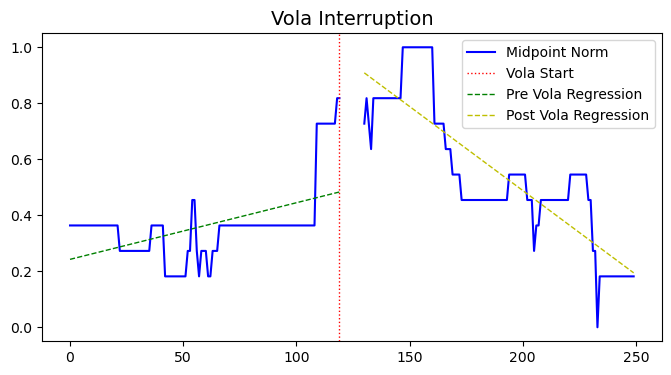

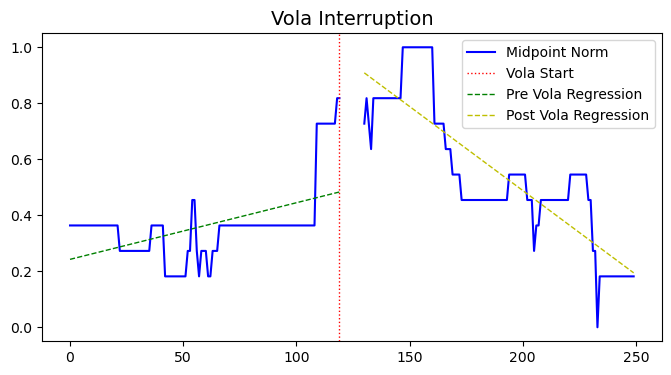

In [6]:
_plot_vola_old(df)

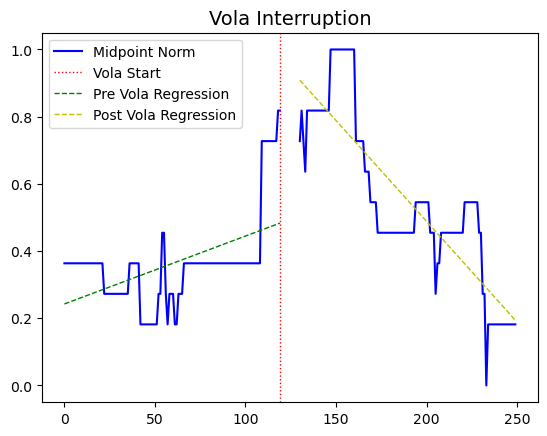

In [19]:
time_frame_seconds = 240
vola_start = (time_frame_seconds / 2) - 1

time_frame_seconds = 240
insert_index = 120
num_rows_to_insert = 10
new_rows = pd.DataFrame(np.nan, index=range(insert_index, insert_index + num_rows_to_insert), columns=df.columns)
df = pd.concat([df.iloc[:insert_index], new_rows, df.iloc[insert_index:]]).reset_index(drop=True)

pre_vola = df[df.index <= 119]
empty = df[(df.index > 119) & (df.index < 130)]
post_vola = df[df.index >= 130]

# Fit a line through before_vola and after_vola
coeff_before = np.polyfit(pre_vola.index, pre_vola["Midpoint_Norm"],1)
coeff_after = np.polyfit(post_vola.index, post_vola["Midpoint_Norm"],1)

line_before = np.polyval(coeff_before, pre_vola.index)
line_after = np.polyval(coeff_after, post_vola.index)

plt.plot(df["Midpoint_Norm"], label="Midpoint Norm", color="b")

plt.axvline(x=vola_start, color="r", linestyle=":",
               linewidth=1, label=f"Vola Start")


plt.plot(pre_vola.index, line_before, linestyle="--", color="g",
        linewidth=1, label="Pre Vola Regression")

plt.plot(post_vola.index, line_after, linestyle="--", color="y",
        linewidth=1, label="Post Vola Regression")

plt.title("Vola Interruption", fontsize=14)
plt.legend()

In [27]:
def create_plot(df):

    time_frame_seconds = 240
    vola_start = (time_frame_seconds / 2) - 1

    time_frame_seconds = 240
    insert_index = 120
    num_rows_to_insert = 10
    new_rows = pd.DataFrame(np.nan, index=range(insert_index, insert_index + num_rows_to_insert), columns=df.columns)
    df = pd.concat([df.iloc[:insert_index], new_rows, df.iloc[insert_index:]]).reset_index(drop=True)

    pre_vola = df[df.index <= 119]
    empty = df[(df.index > 119) & (df.index < 130)]
    post_vola = df[df.index >= 130]

    # Fit a line through before_vola and after_vola
    coeff_before = np.polyfit(pre_vola.index, pre_vola["Midpoint_Norm"],1)
    coeff_after = np.polyfit(post_vola.index, post_vola["Midpoint_Norm"],1)

    line_before = np.polyval(coeff_before, pre_vola.index)
    line_after = np.polyval(coeff_after, post_vola.index)

    plt.plot(df["Midpoint_Norm"], label="Midpoint Norm", color="b")

    plt.axvline(x=vola_start, color="r", linestyle=":",
                   linewidth=1, label=f"Vola Start")


    plt.plot(pre_vola.index, line_before, linestyle="--", color="g",
            linewidth=1, label="Pre Vola Regression")

    plt.plot(post_vola.index, line_after, linestyle="--", color="y",
            linewidth=1, label="Post Vola Regression")

    plt.title("Vola Interruption", fontsize=14)
    plt.legend()

    # return plt.gcf()
    return plt

/var/folders/54/wzg3cy4s2z53tkrw81qg9v100000gn/T/ipykernel_10191/670594874.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


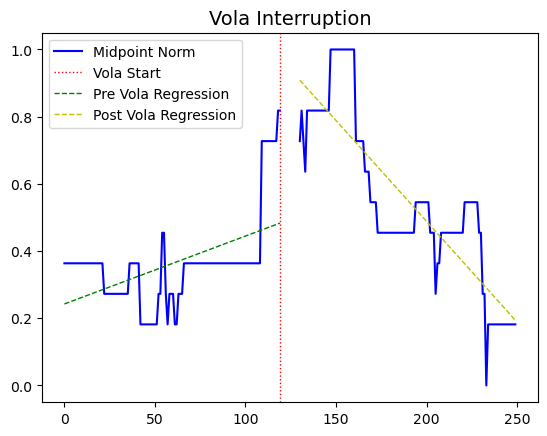

In [28]:
plot = create_plot(df)
plot.show()